In [8]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Load dataset

In [3]:
data_path = 'C:\\Users\\pc\\PycharmProjects\\Week 04 Project 02\\IMDB Dataset.csv'
data = pd.read_csv(data_path)

In [4]:
# Preprocess data

In [6]:
texts = data['review'].values
labels = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

In [9]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=200)
y = np.array(labels)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

In [13]:
stacked_rnn_model = Sequential()
stacked_rnn_model.add(Embedding(input_dim=10000, output_dim=128))
stacked_rnn_model.add(SimpleRNN(64, return_sequences=True))
stacked_rnn_model.add(SimpleRNN(32))
stacked_rnn_model.add(Dense(1, activation='sigmoid'))

In [14]:
stacked_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_stacked = stacked_rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 123ms/step - accuracy: 0.6028 - loss: 0.6534 - val_accuracy: 0.7906 - val_loss: 0.4736
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 118ms/step - accuracy: 0.8291 - loss: 0.3933 - val_accuracy: 0.8298 - val_loss: 0.4039
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.8319 - loss: 0.3847 - val_accuracy: 0.8391 - val_loss: 0.3943
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 122ms/step - accuracy: 0.8557 - loss: 0.3445 - val_accuracy: 0.8298 - val_loss: 0.3982
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 122ms/step - accuracy: 0.8863 - loss: 0.2874 - val_accuracy: 0.8506 - val_loss: 0.3772


In [15]:
#Bi-Directional RNN Model

In [16]:
from tensorflow.keras.layers import Bidirectional

In [17]:
bi_rnn_model = Sequential()
bi_rnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
bi_rnn_model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
bi_rnn_model.add(Bidirectional(SimpleRNN(32)))
bi_rnn_model.add(Dense(1, activation='sigmoid'))

In [18]:
bi_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bi = bi_rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 180ms/step - accuracy: 0.6835 - loss: 0.5612 - val_accuracy: 0.7609 - val_loss: 0.5160
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 174ms/step - accuracy: 0.8430 - loss: 0.3756 - val_accuracy: 0.6810 - val_loss: 0.5823
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.7816 - loss: 0.4574 - val_accuracy: 0.8324 - val_loss: 0.3981
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 170ms/step - accuracy: 0.8394 - loss: 0.3682 - val_accuracy: 0.7803 - val_loss: 0.4725
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.8581 - loss: 0.3267 - val_accuracy: 0.7945 - val_loss: 0.4851


In [19]:
#Results Comparison

In [20]:
import matplotlib.pyplot as plt

In [21]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

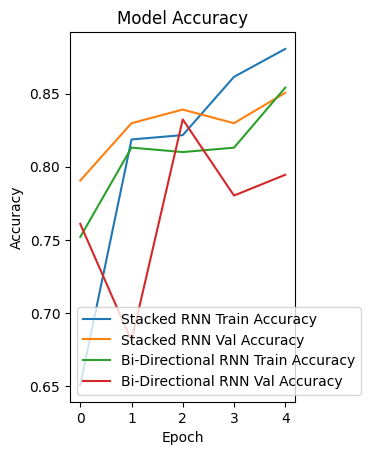

In [22]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_stacked.history['accuracy'], label='Stacked RNN Train Accuracy')
plt.plot(history_stacked.history['val_accuracy'], label='Stacked RNN Val Accuracy')
plt.plot(history_bi.history['accuracy'], label='Bi-Directional RNN Train Accuracy')
plt.plot(history_bi.history['val_accuracy'], label='Bi-Directional RNN Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

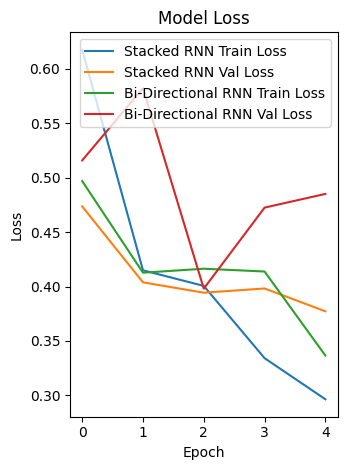

In [23]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_stacked.history['loss'], label='Stacked RNN Train Loss')
plt.plot(history_stacked.history['val_loss'], label='Stacked RNN Val Loss')
plt.plot(history_bi.history['loss'], label='Bi-Directional RNN Train Loss')
plt.plot(history_bi.history['val_loss'], label='Bi-Directional RNN Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()